In [263]:
import os
import pyreadstat
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [264]:
# Paths for different periods
base_path_2015 = "../data/raw/2015-2016"

# Relative paths (common for all periods)
file_paths = {
    "body_measures": "P_BMX.xpt",
    "demographics": "P_DEMO.xpt",
    "blood_pressure_2015": "P_BPXO.xpt",
    "LabData_fast_glucose": "P_GLU.xpt",
    "LabData_glycohemog": "P_GHB.xpt",
    "LabData_insulin": "P_INS.xpt",
    "LabData_Cholest_total": "P_TCHOL.xpt",
    "LabData_Cholest_HDL": "P_HDL.xpt",
    "LabData_Cholest_LDL": "P_TRIGLY.xpt",
    "LabData_C_protein": "P_HSCRP.xpt",
    "LabData_Feretin": "P_FERTIN.xpt",
    "SurveyData_Alcohol_2015": "P_ALQ.xpt",
    "SurveyData_Pressure_Cholest": "P_BPQ.xpt",
    "SurveyData_Diabetes": "P_DIQ.xpt",
    "SurveyData_Diet_Behavior": "P_DBQ.xpt",
    "SurveyData_Insurance": "P_HIQ.xpt",
    "SurveyData_Income": "P_INQ.xpt",
    "SurveyData_Medical": "P_MCQ.xpt",
    "SurveyData_MentalHealth": "P_DPQ.xpt",
    "SurveyData_PhysicalActivity": "P_PAQ.xpt",
    "SurveyData_SleepDisorders": "P_SLQ.xpt",
    "SurveyData_Smoking": "P_SMQ.xpt",
    "SurveyData_WeightHistory": "P_WHQ.xpt"
}


columns_to_keep_2015 = {
    "body_measures": ["SEQN", "BMXWT", "BMXHT", "BMXBMI", "BMXWAIST"],
    "demographics": ["SEQN", "SDDSRVYR", "RIAGENDR", "RIDAGEYR","RIDRETH3","DMDBORN4","DMDEDUC2","RIDEXPRG","INDFMPIR","DMDMARTL","WTINT2YR","WTMEC2YR"],
    #"blood_pressure": ["SEQN", "BPXOSY1", "BPXOSY2", "BPXOSY3", "BPXODI1", "BPXODI2", "BPXODI3","BPXOPLS1", "BPXOPLS2", "BPXOPLS3"],
    "blood_pressure_2015": ["SEQN", "BPXSY1", "BPXSY2", "BPXSY3", "BPXDI1", "BPXDI2", "BPXDI3", "BPXPLS"],
    "LabData_fast_glucose": ["SEQN","WTSAF2YR" ,"LBDGLUSI"],
    "LabData_glycohemog": ["SEQN","LBXGH"],
    "LabData_insulin": ["SEQN","LBXIN"],      
    "LabData_Cholest_total": ["SEQN","LBDTCSI"],
    "LabData_Cholest_HDL": ["SEQN","LBDHDDSI"],
    "LabData_Cholest_LDL": ["SEQN","LBXTR", "LBDTRSI","LBDLDL"],         
    "LabData_C_protein": ["SEQN","LBXHSCRP"],
    "LabData_Feretin": ["SEQN","LBDFERSI"], 
    "SurveyData_Alcohol_2015" : ["SEQN","ALQ110","ALQ120Q","ALQ130","ALQ141Q","ALQ151"],

    "SurveyData_Pressure_Cholest" : ["SEQN","BPQ020","BPQ040A","BPQ050A","BPQ080", "BPQ090D"],
    "SurveyData_Diabetes" : ["SEQN","DIQ160", "DIQ010", "DID040"],
    "SurveyData_Diet_Behavior" : ["SEQN","DBD900","DBD905","DBD910","DBQ197","DBD895","DBD030", "DBD041", "DBQ700"],
    "SurveyData_Insurance" : ["SEQN","HIQ011"],
    "SurveyData_Income" : ["SEQN","INDFMMPC"],
    "SurveyData_Medical" : ["SEQN","MCQ080","MCQ160B","MCQ160C","MCQ160M","MCQ300C"],
    "SurveyData_MentalHealth" : ["SEQN","DPQ020","DPQ030","DPQ040","DPQ060","DPQ070"],
    "SurveyData_PhysicalActivity" : ["SEQN","PAQ605","PAQ620","PAQ635","PAQ650","PAQ665","PAD680"],
    "SurveyData_SleepDisorders" : ["SEQN","SLD012","SLQ120"],
    "SurveyData_Smoking" : ["SEQN","SMQ020","SMD650","SMD030","SMQ040"],
    "SurveyData_WeightHistory" : ["SEQN","WHD110","WHD120","WHD140"]  
}




In [265]:
def load_data(base_path, file_paths, columns_to_keep):
    """
    Loads data from the specified file paths and filters the columns.

    """

    dataframes = {}
    for key, relative_path in file_paths.items():
        # Construct the full file path
        file_path = os.path.join(base_path, relative_path)
        try:
            # Check if the file exists
            if not os.path.exists(file_path):
                print(f"Error: File '{file_path}' does not exist!")
                continue

            # Handle specific encoding if needed (e.g., for 'LabData_insulin')
            if key == "LabData_insulin":
                data, _ = pyreadstat.read_xport(file_path, encoding="latin1")
            else:
                # Default loading
                data, _ = pyreadstat.read_xport(file_path)

            # Filter columns based on the specified list
            dataframes[key] = data[columns_to_keep[key]]
            print(f"The file '{key}' has been successfully loaded.")
        except Exception as e:
            print(f"Error loading the file '{key}': {e}")
    return dataframes

In [266]:
# Load data 
dataframes_2015 = load_data(base_path_2015, file_paths, columns_to_keep_2015)

# Check the loaded datasets
print("Loaded datasets:")
for key, df in dataframes_2015.items():
    print(f"{key}: {len(df)} rows, {len(df.columns)} columns")

The file 'body_measures' has been successfully loaded.
The file 'demographics' has been successfully loaded.
The file 'blood_pressure_2015' has been successfully loaded.
The file 'LabData_fast_glucose' has been successfully loaded.
The file 'LabData_glycohemog' has been successfully loaded.
The file 'LabData_insulin' has been successfully loaded.
The file 'LabData_Cholest_total' has been successfully loaded.
The file 'LabData_Cholest_HDL' has been successfully loaded.
The file 'LabData_Cholest_LDL' has been successfully loaded.
The file 'LabData_C_protein' has been successfully loaded.
The file 'LabData_Feretin' has been successfully loaded.
The file 'SurveyData_Alcohol_2015' has been successfully loaded.
The file 'SurveyData_Pressure_Cholest' has been successfully loaded.
The file 'SurveyData_Diabetes' has been successfully loaded.
The file 'SurveyData_Diet_Behavior' has been successfully loaded.
The file 'SurveyData_Insurance' has been successfully loaded.
The file 'SurveyData_Income

In [251]:
final_dataset_2015 = reduce(
    lambda left, right: left.merge(right, on="SEQN", how="outer"), 
    dataframes_2015.values())

print(final_dataset_2015.shape)

final_dataset_2015.head()



(9971, 82)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTL,WTINT2YR,WTMEC2YR,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3,BPXPLS,WTSAF2YR,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ110,ALQ120Q,ALQ130,ALQ141Q,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DIQ010,DID040,DBD900,DBD905,DBD910,DBQ197,DBD895,DBD030,DBD041,DBQ700,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLQ120,SMQ020,SMD650,SMD030,SMQ040,WHD110,WHD120,WHD140
0,83732.0,94.8,184.5,27.8,101.1,9.0,1.0,62.0,3.0,1.0,5.0,NaN,4.39,1.0,134671.370419,135629.507405,128.0,124.0,116.0,70.0,64.0,62.0,76.0,NaN,NaN,7.0,NaN,4.47,1.19,NaN,NaN,NaN,0.6,NaN,NaN,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,NaN,1.0,46.0,0.0,2.0,0.0,3.0,1.0,NaN,NaN,3.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,480.0,5.5,3.0,1.0,NaN,22.0,3.0,230.0,205.0,260.0
1,83733.0,90.4,171.4,30.8,107.9,9.0,1.0,53.0,3.0,2.0,3.0,NaN,1.32,3.0,24328.560239,25282.425927,146.0,140.0,134.0,88.0,88.0,82.0,72.0,54722.343330,5.59,5.5,17.26,6.85,1.63,147.0,1.660,173.0,1.4,NaN,NaN,7.0,6.0,7.0,1.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,300.0,8.0,0.0,1.0,20.0,20.0,1.0,180.0,160.0,205.0
2,83734.0,83.4,170.1,28.8,116.5,9.0,1.0,78.0,3.0,1.0,3.0,NaN,1.51,1.0,12400.008522,12575.838818,138.0,132.0,136.0,46.0,44.0,46.0,56.0,25471.093699,4.66,5.8,11.77,5.92,0.78,269.0,3.037,145.0,0.6,NaN,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,52.0,4.0,0.0,0.0,2.0,4.0,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,480.0,7.0,3.0,1.0,NaN,14.0,3.0,224.0,165.0,240.0
3,83735.0,109.8,160.9,42.4,110.1,9.0,2.0,56.0,3.0,1.0,5.0,NaN,5.00,6.0,102717.995647,102078.634508,132.0,134.0,136.0,72.0,68.0,70.0,78.0,NaN,NaN,5.6,NaN,4.50,1.58,NaN,NaN,NaN,9.0,NaN,1.0,3.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,2.0,NaN,1.0,11.0,15.0,0.0,3.0,NaN,NaN,4.0,1.0,3.0,1.0,2.0,2.0,2.0,9.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,480.0,6.5,4.0,2.0,NaN,NaN,NaN,160.0,120.0,240.0
4,83736.0,55.2,164.9,20.3,80.4,9.0,2.0,42.0,4.0,1.0,4.0,1.0,1.23,3.0,17627.674984,18234.736219,100.0,114.0,98.0,70.0,54.0,56.0,76.0,38179.510870,4.66,5.6,5.42,5.28,1.37,47.0,0.531,142.0,0.5,67.2,1.0,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,1.0,3.0,1.0,0.0,3.0,NaN,NaN,5.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,540.0,NaN,1.0,2.0,NaN,NaN,NaN,127.0,127.0,135.0


In [252]:
# Update the SDDSRVYR column to represent the period
final_dataset_2015['SDDSRVYR'] = '2015-2016'

# Add the period to SEQN by concatenating the values
final_dataset_2015['SEQN'] = final_dataset_2015['SEQN'].astype(str) + '_' + final_dataset_2015['SDDSRVYR']

# Validate the changes
print(final_dataset_2015[['SEQN', 'SDDSRVYR']].head())

                SEQN   SDDSRVYR
0  83732.0_2015-2016  2015-2016
1  83733.0_2015-2016  2015-2016
2  83734.0_2015-2016  2015-2016
3  83735.0_2015-2016  2015-2016
4  83736.0_2015-2016  2015-2016


In [253]:
final_dataset_2015.columns

final_dataset_2015.shape

(9971, 82)

In [254]:
# Create the WHtR feature
final_dataset_2015['WHtR'] = round(final_dataset_2015['BMXWAIST'] / final_dataset_2015['BMXHT'],2)
# Checking
#final_dataset_2017[['BMXWAIST', 'BMXHT', 'WHtR']].head(20)

# Calculate derived features
final_dataset_2015['AvgSystolicBP'] = final_dataset_2015[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1)
final_dataset_2015['AvgDiastolicBP'] = final_dataset_2015[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1)
final_dataset_2015['PulsePressure'] = final_dataset_2015['AvgSystolicBP'] - final_dataset_2015['AvgDiastolicBP']
final_dataset_2015['AvgPulseRate'] = final_dataset_2015['BPXPLS']

# Drop original columns
columns_to_drop = ['BPXSY1', 'BPXSY2', 'BPXSY3',
                   'BPXDI1', 'BPXDI2', 'BPXDI3',
                   'BPXPLS']

In [255]:
final_dataset_2015.drop(columns=columns_to_drop, inplace=True)
final_dataset_2015[['AvgSystolicBP', 'AvgDiastolicBP', 'PulsePressure', 'AvgPulseRate']].head()

,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate
0,122.666667,65.333333,57.333333,76.0
1,140.000000,86.000000,54.000000,72.0
2,135.333333,45.333333,90.000000,56.0
3,134.000000,70.000000,64.000000,78.0
4,104.000000,60.000000,44.000000,76.0


In [256]:

print(final_dataset_2015.shape)
print(final_dataset_2015.columns)

final_dataset_2015.head()

(9971, 80)
Index(['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'SDDSRVYR', 'RIAGENDR',
       'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG', 'INDFMPIR',
       'DMDMARTL', 'WTINT2YR', 'WTMEC2YR', 'WTSAF2YR', 'LBDGLUSI', 'LBXGH',
       'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 'LBDTRSI', 'LBDLDL',
       'LBXHSCRP', 'LBDFERSI', 'ALQ110', 'ALQ120Q', 'ALQ130', 'ALQ141Q',
       'ALQ151', 'BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'DIQ160',
       'DIQ010', 'DID040', 'DBD900', 'DBD905', 'DBD910', 'DBQ197', 'DBD895',
       'DBD030', 'DBD041', 'DBQ700', 'HIQ011', 'INDFMMPC', 'MCQ080', 'MCQ160B',
       'MCQ160C', 'MCQ160M', 'MCQ300C', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ060',
       'DPQ070', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'PAD680',
       'SLD012', 'SLQ120', 'SMQ020', 'SMD650', 'SMD030', 'SMQ040', 'WHD110',
       'WHD120', 'WHD140', 'WHtR', 'AvgSystolicBP', 'AvgDiastolicBP',
       'PulsePressure', 'AvgPulseRate'],
      dtype='object')


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTL,WTINT2YR,WTMEC2YR,WTSAF2YR,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ110,ALQ120Q,ALQ130,ALQ141Q,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DIQ010,DID040,DBD900,DBD905,DBD910,DBQ197,DBD895,DBD030,DBD041,DBQ700,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLQ120,SMQ020,SMD650,SMD030,SMQ040,WHD110,WHD120,WHD140,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate
0,83732.0_2015-2016,94.8,184.5,27.8,101.1,2015-2016,1.0,62.0,3.0,1.0,5.0,NaN,4.39,1.0,134671.370419,135629.507405,NaN,NaN,7.0,NaN,4.47,1.19,NaN,NaN,NaN,0.6,NaN,NaN,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,NaN,1.0,46.0,0.0,2.0,0.0,3.0,1.0,NaN,NaN,3.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,480.0,5.5,3.0,1.0,NaN,22.0,3.0,230.0,205.0,260.0,0.55,122.666667,65.333333,57.333333,76.0
1,83733.0_2015-2016,90.4,171.4,30.8,107.9,2015-2016,1.0,53.0,3.0,2.0,3.0,NaN,1.32,3.0,24328.560239,25282.425927,54722.343330,5.59,5.5,17.26,6.85,1.63,147.0,1.660,173.0,1.4,NaN,NaN,7.0,6.0,7.0,1.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,300.0,8.0,0.0,1.0,20.0,20.0,1.0,180.0,160.0,205.0,0.63,140.000000,86.000000,54.000000,72.0
2,83734.0_2015-2016,83.4,170.1,28.8,116.5,2015-2016,1.0,78.0,3.0,1.0,3.0,NaN,1.51,1.0,12400.008522,12575.838818,25471.093699,4.66,5.8,11.77,5.92,0.78,269.0,3.037,145.0,0.6,NaN,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,52.0,4.0,0.0,0.0,2.0,4.0,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,480.0,7.0,3.0,1.0,NaN,14.0,3.0,224.0,165.0,240.0,0.68,135.333333,45.333333,90.000000,56.0
3,83735.0_2015-2016,109.8,160.9,42.4,110.1,2015-2016,2.0,56.0,3.0,1.0,5.0,NaN,5.00,6.0,102717.995647,102078.634508,NaN,NaN,5.6,NaN,4.50,1.58,NaN,NaN,NaN,9.0,NaN,1.0,3.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,2.0,NaN,1.0,11.0,15.0,0.0,3.0,NaN,NaN,4.0,1.0,3.0,1.0,2.0,2.0,2.0,9.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,480.0,6.5,4.0,2.0,NaN,NaN,NaN,160.0,120.0,240.0,0.68,134.000000,70.000000,64.000000,78.0
4,83736.0_2015-2016,55.2,164.9,20.3,80.4,2015-2016,2.0,42.0,4.0,1.0,4.0,1.0,1.23,3.0,17627.674984,18234.736219,38179.510870,4.66,5.6,5.42,5.28,1.37,47.0,0.531,142.0,0.5,67.2,1.0,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,1.0,3.0,1.0,0.0,3.0,NaN,NaN,5.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,540.0,NaN,1.0,2.0,NaN,NaN,NaN,127.0,127.0,135.0,0.49,104.000000,60.000000,44.000000,76.0


### **Transformation** 
### **ALQ120Q → ALQ121 (Fréquence consommation alcool)**
### **ALQ141Q → ALQ142 (Fréquence 4/5 verres consommés)**

In [257]:
def convert_alq120q_to_alq121(value):
    if pd.isna(value):  # Valeurs manquantes restent NaN
        return None
    if value == 0:
        return 0  # Never in the last year
    elif value == 365:
        return 1  # Every day
    elif 300 <= value < 365:
        return 2  # Nearly every day
    elif 156 <= value < 300:
        return 3  # 3 to 4 times a week
    elif 104 <= value < 156:
        return 4  # 2 times a week
    elif 52 <= value < 104:
        return 5  # Once a week
    elif 24 <= value < 52:
        return 6  # 2 to 3 times a month
    elif 12 <= value < 24:
        return 7  # Once a month
    elif 7 <= value < 12:
        return 8  # 7 to 11 times a year
    elif 3 <= value < 7:
        return 9  # 3 to 6 times a year
    elif 1 <= value < 3:
        return 10  # 1 to 2 times a year
    else:
        return None  # Valeur inconnue

final_dataset_2015["ALQ121"] = final_dataset_2015["ALQ120Q"].apply(convert_alq120q_to_alq121)
final_dataset_2015["ALQ142"] = final_dataset_2015["ALQ141Q"].apply(convert_alq120q_to_alq121)

#ALQ110 (2015-2016) devient ALQ111 pour être compatible avec 2017-2021.
final_dataset_2015.rename(columns={"ALQ110": "ALQ111"}, inplace=True)

final_dataset_2015.rename(columns={"DMDMARTL": "DMDMARTZ"}, inplace=True)

rename_dict = {
    "WTINT2YR": "WTINTPRP",
    "WTSAF2YR": "WTSAFPRP",
    "WTMEC2YR": "WTMECPRP"
}

# Переименуем колонки в 2015-2016
final_dataset_2015.rename(columns=rename_dict, inplace=True)


final_dataset_2015.drop(columns=["ALQ120Q", "ALQ141Q"], inplace=True)




In [258]:

print(final_dataset_2015.shape)
print(final_dataset_2015.columns)
print(final_dataset_2015.shape)

final_dataset_2015.head()



# Sauvegarde du dataset transformé et fusionné
final_dataset_2015.to_csv("dataset_2015.csv", index=False, encoding="utf-8")

(9971, 80)
Index(['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'SDDSRVYR', 'RIAGENDR',
       'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG', 'INDFMPIR',
       'DMDMARTZ', 'WTINTPRP', 'WTMECPRP', 'WTSAFPRP', 'LBDGLUSI', 'LBXGH',
       'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 'LBDTRSI', 'LBDLDL',
       'LBXHSCRP', 'LBDFERSI', 'ALQ111', 'ALQ130', 'ALQ151', 'BPQ020',
       'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'DIQ160', 'DIQ010', 'DID040',
       'DBD900', 'DBD905', 'DBD910', 'DBQ197', 'DBD895', 'DBD030', 'DBD041',
       'DBQ700', 'HIQ011', 'INDFMMPC', 'MCQ080', 'MCQ160B', 'MCQ160C',
       'MCQ160M', 'MCQ300C', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ060', 'DPQ070',
       'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'PAD680', 'SLD012',
       'SLQ120', 'SMQ020', 'SMD650', 'SMD030', 'SMQ040', 'WHD110', 'WHD120',
       'WHD140', 'WHtR', 'AvgSystolicBP', 'AvgDiastolicBP', 'PulsePressure',
       'AvgPulseRate', 'ALQ121', 'ALQ142'],
      dtype='object')
(9971, 80)


In [192]:
final_dataset_2015 = final_dataset_2015.dropna(subset=['LBDGLUSI', 'LBXGH', 'LBXIN'])
print(final_dataset_2015.shape)
final_dataset_2015[['LBDGLUSI', 'LBXGH', 'LBXIN']].isna().sum()

(2917, 80)


LBDGLUSI    0
LBXGH       0
LBXIN       0
dtype: int64

In [269]:
final_dataset_2015['SLD012'].value_counts()

8.0     1217
7.0      954
9.0      707
7.5      679
8.5      526
6.0      476
6.5      393
10.0     322
9.5      198
5.0      177
11.0     153
5.5      144
4.0       88
10.5      56
12.0      55
4.5       52
3.0       31
11.5      20
13.0      14
3.5       13
14.0       6
12.5       5
2.0        4
14.5       2
2.5        1
13.5       1
Name: SLD012, dtype: int64

In [193]:
# Creating HOMA-IR 
# Formula: HOMA-IR = (Fasting Glucose * Insulin) / 22.5

final_dataset_2015['HOMA_IR'] = (final_dataset_2015['LBDGLUSI'] * final_dataset_2015['LBXIN']) / 22.5

#Diabetes_Status

def determine_diabetes_status(row):
    if row['LBDGLUSI'] >= 7.0 or row['LBXGH'] >= 6.5:
        return 2  # Diabetes
    elif 5.6 <= row['LBDGLUSI'] < 7.0 or 5.7 <= row['LBXGH'] < 6.5:
        return 1  # Prediabetes
    else:
        return 0  # Normal

# creation target 1 
final_dataset_2015['Diabetes_Status'] = final_dataset_2015.apply(determine_diabetes_status, axis=1)

# Assign Insulin_Resistance based on HOMA-IR > 2.9
final_dataset_2015['Insulin_Resistance'] = (final_dataset_2015['HOMA_IR'] > 2.9).astype(int)


In [194]:
print(final_dataset_2015.shape)
final_dataset_2015.head()

(2917, 83)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTL,WTINT2YR,WTMEC2YR,WTSAF2YR,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ110,ALQ120Q,ALQ130,ALQ141Q,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DIQ010,DID040,DBD900,DBD905,DBD910,DBQ197,DBD895,DBD030,DBD041,DBQ700,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLQ120,SMQ020,SMD650,SMD030,SMQ040,WHD110,WHD120,WHD140,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,HOMA_IR,Diabetes_Status,Insulin_Resistance
1,83733.0_2015-2016,90.4,171.4,30.8,107.9,2015-2016,1.0,53.0,3.0,2.0,3.0,NaN,1.32,3.0,24328.560239,25282.425927,54722.343330,5.59,5.5,17.26,6.85,1.63,147.0,1.660,173.0,1.4,NaN,NaN,7.0,6.0,7.0,1.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,300.0,8.0,0.0,1.0,20.0,20.0,1.0,180.0,160.0,205.0,0.63,140.000000,86.000000,54.000000,72.0,4.288151,0,1
2,83734.0_2015-2016,83.4,170.1,28.8,116.5,2015-2016,1.0,78.0,3.0,1.0,3.0,NaN,1.51,1.0,12400.008522,12575.838818,25471.093699,4.66,5.8,11.77,5.92,0.78,269.0,3.037,145.0,0.6,NaN,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,52.0,4.0,0.0,0.0,2.0,4.0,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,480.0,7.0,3.0,1.0,NaN,14.0,3.0,224.0,165.0,240.0,0.68,135.333333,45.333333,90.000000,56.0,2.437698,1,0
4,83736.0_2015-2016,55.2,164.9,20.3,80.4,2015-2016,2.0,42.0,4.0,1.0,4.0,1.0,1.23,3.0,17627.674984,18234.736219,38179.510870,4.66,5.6,5.42,5.28,1.37,47.0,0.531,142.0,0.5,67.2,1.0,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,1.0,3.0,1.0,0.0,3.0,NaN,NaN,5.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,540.0,NaN,1.0,2.0,NaN,NaN,NaN,127.0,127.0,135.0,0.49,104.000000,60.000000,44.000000,76.0,1.122542,0,0
5,83737.0_2015-2016,64.4,150.0,28.6,92.9,2015-2016,2.0,72.0,1.0,2.0,2.0,NaN,2.82,4.0,11252.311968,10878.684022,25800.845631,5.93,5.9,8.24,4.91,2.02,46.0,0.519,103.0,2.5,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,0.0,0.0,0.0,2.0,1.0,NaN,NaN,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,10.0,9.0,1.0,2.0,NaN,NaN,NaN,148.0,150.0,150.0,0.62,119.333333,58.666667,60.666667,64.0,2.171698,1,0
9,83741.0_2015-2016,76.6,165.4,28.0,86.6,2015-2016,1.0,22.0,4.0,1.0,4.0,NaN,2.08,5.0,37043.087007,39353.307397,108751.289086,5.27,5.6,11.39,4.24,1.24,68.0,0.768,102.0,1.3,NaN,NaN,3.0,8.0,20.0,1.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,3.0,0.0,0.0,2.0,3.0,NaN,NaN,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,540.0,6.5,1.0,1.0,1.0,0.0,2.0,NaN,NaN,230.0,0.52,111.333333,72.666667,38.666667,66.0,2.667791,0,0


In [153]:
print(final_dataset_2015['Diabetes_Status'].value_counts())
print(final_dataset_2015['Insulin_Resistance'].value_counts())

print(final_dataset_2015.columns)

1    1298
0    1181
2     438
Name: Diabetes_Status, dtype: int64
0    1684
1    1233
Name: Insulin_Resistance, dtype: int64
Index(['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'SDDSRVYR', 'RIAGENDR',
       'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG', 'INDFMPIR',
       'DMDMARTL', 'WTINT2YR', 'WTMEC2YR', 'WTSAF2YR', 'LBDGLUSI', 'LBXGH',
       'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 'LBDTRSI', 'LBDLDL',
       'LBXHSCRP', 'LBDFERSI', 'ALQ110', 'ALQ120Q', 'ALQ130', 'ALQ141Q',
       'ALQ151', 'BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'DIQ160',
       'DBD900', 'DBD905', 'DBD910', 'DBQ197', 'DBD895', 'HIQ011', 'INDFMMPC',
       'MCQ080', 'MCQ160B', 'MCQ160C', 'MCQ160M', 'MCQ300C', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ060', 'DPQ070', 'PAQ605', 'PAQ620', 'PAQ635',
       'PAQ650', 'PAQ665', 'PAD680', 'SLD012', 'SLQ120', 'SMQ020', 'SMD650',
       'WHD110', 'WHD120', 'WHD140', 'WHtR', 'AvgSystolicBP', 'AvgDiastolicBP',
       'PulsePressure', 'AvgPulseRa

In [154]:
columns_order = [
        'SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'WHtR', 'AvgSystolicBP', 
        'AvgDiastolicBP','PulsePressure', 'AvgPulseRate', 'SDDSRVYR', 'RIAGENDR',
        'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG', 'INDFMPIR',
        'DMDMARTL', 'LBDGLUSI', 'LBXGH', 'LBXIN','LBDTCSI', 'LBDHDDSI', 'LBXTR', 
        'LBDTRSI', 'LBDLDL', 'LBXHSCRP','LBDFERSI', 'ALQ110', 'ALQ120Q', 'ALQ130', 
        'ALQ141Q', 'ALQ151','BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 
        'DIQ160', 'DBD900','DBD905', 'DBD910', 'DBQ197', 'DBD895', 'HIQ011', 
        'INDFMMPC', 'MCQ080','MCQ160B', 'MCQ160C', 'MCQ160M', 'MCQ300C', 'DPQ020', 
        'DPQ030','DPQ040', 'DPQ060', 'DPQ070', 'PAQ605', 'PAQ620', 'PAQ635', 
        'PAQ650','PAQ665', 'PAD680', 'SLD012', 'SLQ120', 'SMQ020', 'SMD650', 
        'WHD110','WHD120', 'WHD140','HOMA_IR', 
        # Таргетные переменные
       'Diabetes_Status','Insulin_Resistance',
       'WTINT2YR', 'WTMEC2YR',"WTSAF2YR"

]




final_dataset_2015 = final_dataset_2015[columns_order]

In [195]:
print(final_dataset_2015.shape)
final_dataset_2015.head()

(2917, 83)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTL,WTINT2YR,WTMEC2YR,WTSAF2YR,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ110,ALQ120Q,ALQ130,ALQ141Q,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DIQ010,DID040,DBD900,DBD905,DBD910,DBQ197,DBD895,DBD030,DBD041,DBQ700,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLQ120,SMQ020,SMD650,SMD030,SMQ040,WHD110,WHD120,WHD140,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,HOMA_IR,Diabetes_Status,Insulin_Resistance
1,83733.0_2015-2016,90.4,171.4,30.8,107.9,2015-2016,1.0,53.0,3.0,2.0,3.0,NaN,1.32,3.0,24328.560239,25282.425927,54722.343330,5.59,5.5,17.26,6.85,1.63,147.0,1.660,173.0,1.4,NaN,NaN,7.0,6.0,7.0,1.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,300.0,8.0,0.0,1.0,20.0,20.0,1.0,180.0,160.0,205.0,0.63,140.000000,86.000000,54.000000,72.0,4.288151,0,1
2,83734.0_2015-2016,83.4,170.1,28.8,116.5,2015-2016,1.0,78.0,3.0,1.0,3.0,NaN,1.51,1.0,12400.008522,12575.838818,25471.093699,4.66,5.8,11.77,5.92,0.78,269.0,3.037,145.0,0.6,NaN,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,52.0,4.0,0.0,0.0,2.0,4.0,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,480.0,7.0,3.0,1.0,NaN,14.0,3.0,224.0,165.0,240.0,0.68,135.333333,45.333333,90.000000,56.0,2.437698,1,0
4,83736.0_2015-2016,55.2,164.9,20.3,80.4,2015-2016,2.0,42.0,4.0,1.0,4.0,1.0,1.23,3.0,17627.674984,18234.736219,38179.510870,4.66,5.6,5.42,5.28,1.37,47.0,0.531,142.0,0.5,67.2,1.0,1.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,1.0,3.0,1.0,0.0,3.0,NaN,NaN,5.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,540.0,NaN,1.0,2.0,NaN,NaN,NaN,127.0,127.0,135.0,0.49,104.000000,60.000000,44.000000,76.0,1.122542,0,0
5,83737.0_2015-2016,64.4,150.0,28.6,92.9,2015-2016,2.0,72.0,1.0,2.0,2.0,NaN,2.82,4.0,11252.311968,10878.684022,25800.845631,5.93,5.9,8.24,4.91,2.02,46.0,0.519,103.0,2.5,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,0.0,0.0,0.0,2.0,1.0,NaN,NaN,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,10.0,9.0,1.0,2.0,NaN,NaN,NaN,148.0,150.0,150.0,0.62,119.333333,58.666667,60.666667,64.0,2.171698,1,0
9,83741.0_2015-2016,76.6,165.4,28.0,86.6,2015-2016,1.0,22.0,4.0,1.0,4.0,NaN,2.08,5.0,37043.087007,39353.307397,108751.289086,5.27,5.6,11.39,4.24,1.24,68.0,0.768,102.0,1.3,NaN,NaN,3.0,8.0,20.0,1.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,3.0,0.0,0.0,2.0,3.0,NaN,NaN,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,540.0,6.5,1.0,1.0,1.0,0.0,2.0,NaN,NaN,230.0,0.52,111.333333,72.666667,38.666667,66.0,2.667791,0,0


In [156]:
final_dataset_2015['DMDMARTL'].value_counts()

1.0     1242
5.0      425
3.0      263
6.0      214
2.0      185
4.0       82
77.0       1
Name: DMDMARTL, dtype: int64

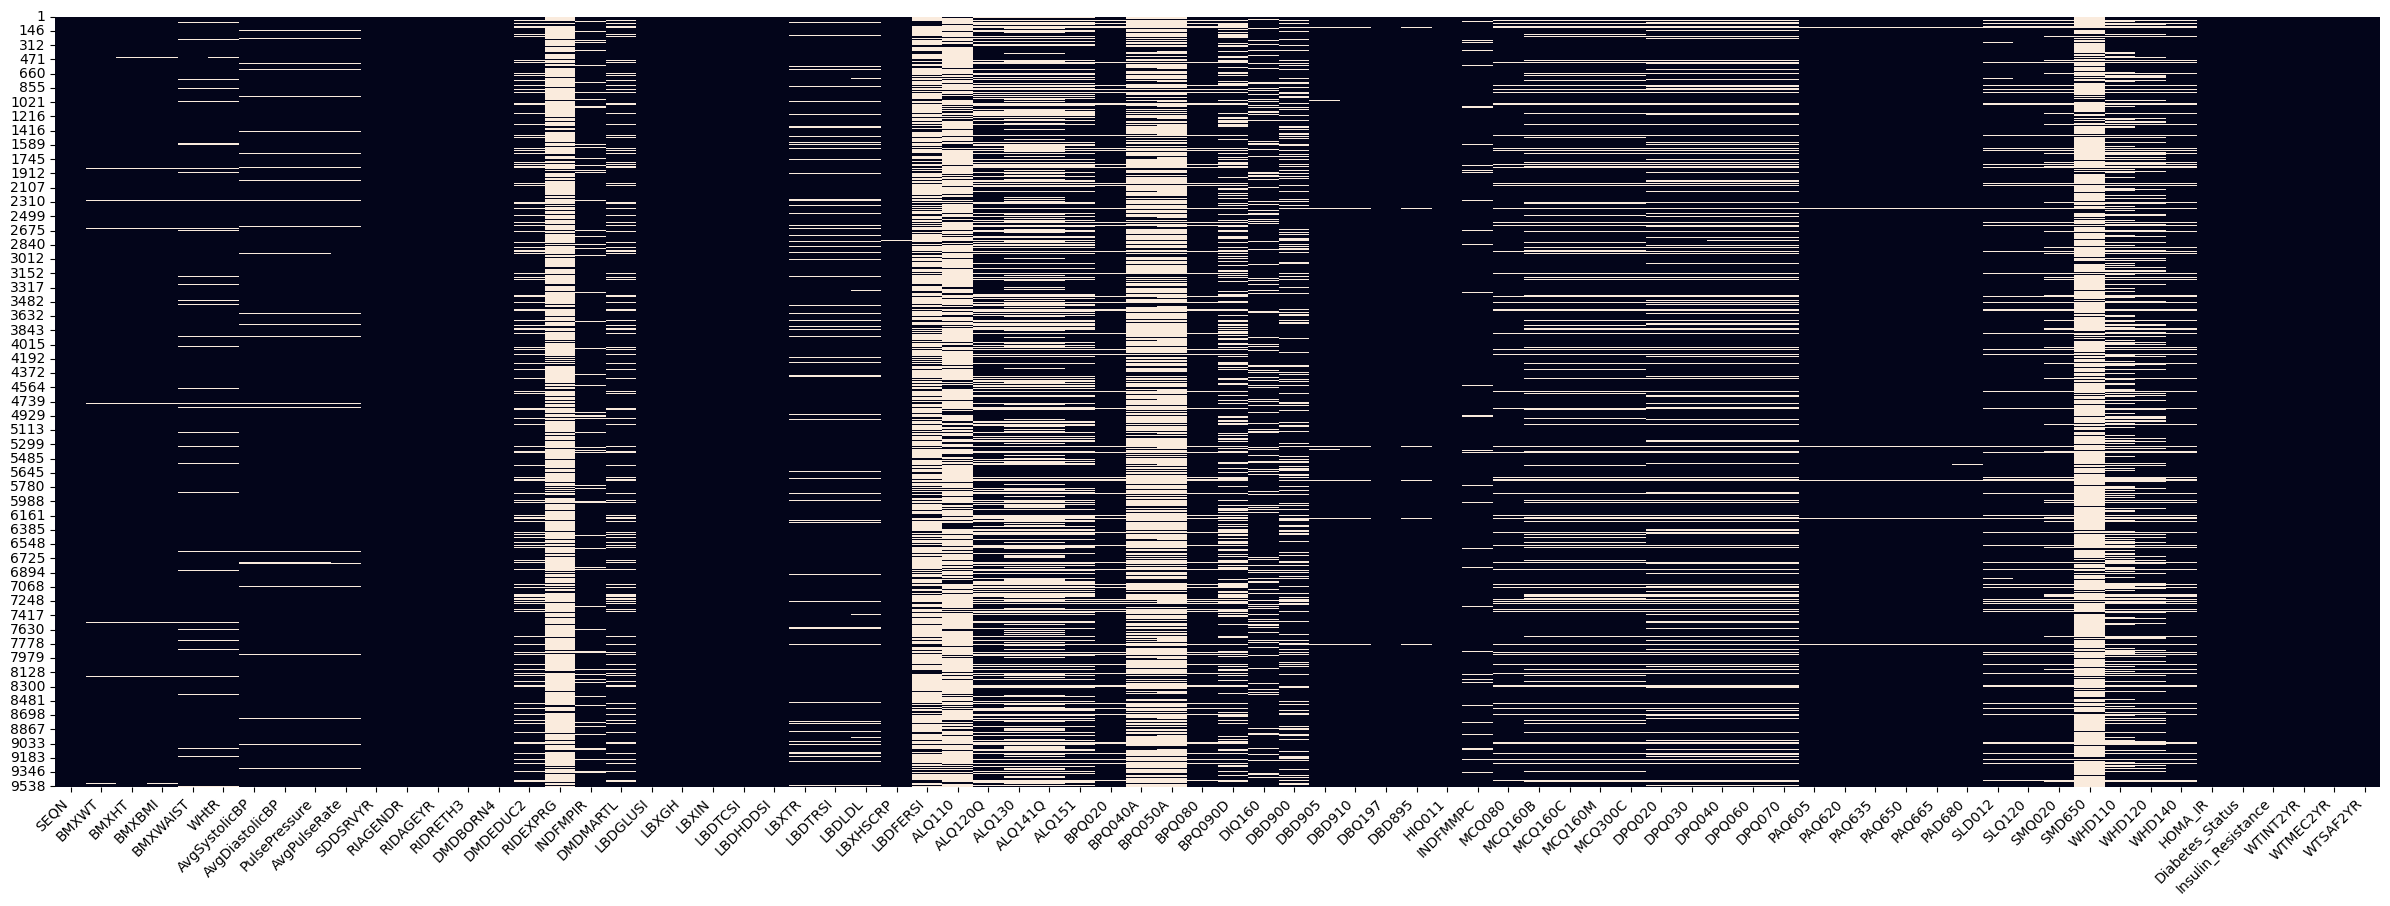

In [157]:
plt.figure(figsize=(30,10))
sns.heatmap(final_dataset_2015.isna(),cbar=False)
plt.xticks(rotation=45, ha='right')  # Поворот на 45 градусов и выравнивание по правому краю

plt.show()

In [196]:
final_dataset_2015.isna().sum()

SEQN                     0
BMXWT                   25
BMXHT                   23
BMXBMI                  28
BMXWAIST               140
SDDSRVYR                 0
RIAGENDR                 0
RIDAGEYR                 0
RIDRETH3                 0
DMDBORN4                 0
DMDEDUC2               505
RIDEXPRG              2415
INDFMPIR               289
DMDMARTL               505
WTINT2YR                 0
WTMEC2YR                 0
WTSAF2YR                 0
LBDGLUSI                 0
LBXGH                    0
LBXIN                    0
LBDTCSI                  1
LBDHDDSI                 1
LBXTR                  228
LBDTRSI                228
LBDLDL                 252
LBXHSCRP                 5
LBDFERSI              2052
ALQ110                2156
ALQ120Q               1023
ALQ130                1403
ALQ141Q               1403
ALQ151                1023
BPQ020                 249
BPQ040A               2002
BPQ050A               2116
BPQ080                 249
BPQ090D                954
D

1. Идентификатор
	•	SEQN: Уникальный идентификатор респондента.
	
2. Антропометрия (Body Measures)
	•	BMXWT: Вес (кг).
	•	BMXHT: Рост (см).
	•	BMXBMI: Индекс массы тела (кг/м²).
	•	BMXWAIST: Обхват талии (см).
	•	WHtR: Соотношение талии к росту (BMXWAIST / BMXHT).
	
3. Артериальное давление
	•	AvgSystolicBP: Среднее систолическое давление (мм рт. ст.).
	•	AvgDiastolicBP: Среднее диастолическое давление (мм рт. ст.).
	•	PulsePressure: Пульсовое давление (AvgSystolicBP − AvgDiastolicBP).
	•	AvgPulseRate: Средний пульс (удары в минуту).
	
4. Демографические признаки
	•	SDDSRVYR: Цикл данных (период).
	•	RIAGENDR: Пол (1 — Мужчина, 2 — Женщина).
	•	RIDAGEYR: Возраст (лет).
	•	RIDRETH3: Расовая принадлежность.
	•	DMDBORN4: Место рождения.
	•	DMDEDUC2: Уровень образования.
	•	RIDEXPRG: Статус беременности.
	•	WTINTPRP, WTMECPRP: Весовые коэффициенты для выборки.
	•	INDFMPIR: Соотношение дохода семьи к бедности.
	•	DMDMARTZ: Семейное положение.
	
5. Лабораторные анализы
	•	WTSAFPRP: Весовой коэффициент для анализа глюкозы.
	•	LBDGLUSI: Глюкоза натощак (ммоль/л).
	•	LBXGH: Гликированный гемоглобин (%).
	•	LBXIN: Инсулин (мкЕд/мл).
	•	LBDTCSI: Общий холестерин (ммоль/л).
	•	LBDHDDSI: Холестерин ЛПВП (ммоль/л).
	•	LBXTR: Триглицериды (мг/дл).
	•	LBDTRSI: Триглицериды (ммоль/л).
	•	LBDLDL: Холестерин ЛПНП (ммоль/л).
	•	LBXHSCRP: С-реактивный белок (мг/л).
	•	LBDFERSI: Ферритин (мкг/л).
	
6. Употребление алкоголя
	•	ALQ111: Наличие опыта употребления алкоголя.
	•	ALQ121: Частота употребления алкоголя за последний год.
	•	ALQ130: Среднее количество напитков за день.
	•	ALQ142: Количество дней с употреблением алкоголя за последние 12 месяцев.
	•	ALQ151: Периоды частого употребления алкоголя.
	
7. История гипертонии и заболеваний
	•	BPQ020: Диагностирована ли гипертония.
	•	BPQ040A: Принимает ли препараты от гипертонии.
	•	BPQ050A: Принимает ли препараты от высокого давления.
	•	BPQ080: Диагностирован ли высокий уровень холестерина.
	•	BPQ090D: Принимает ли препараты для снижения уровня холестерина.
	
8. Диабет
	•	DIQ160: Ever told you have prediabetes
	•	DIQ010: Doctor told you have diabetes
	•	DID040: Age when first told you had diabetes

	
9. Диетическое поведение
	•	DBD900: Количество приемов пищи в заведениях фастфуда за последние 30 дней.
	•	DBD905: Количество готовых к употреблению продуктов за последние 30 дней.
	•	DBD910: Количество замороженных блюд за последние 30 дней.
	•	DBQ197: Потребление молочных продуктов за последние 30 дней.
	•	DBD895: Количество приемов пищи, приготовленных не дома.
	•	DBD030: Age stopped breastfeeding(days).
	•	DBD041: Age first fed formula(days)
						•	DBQ930: Main meal planner/preparer
	•	DBQ700: How healthy is the diet
	
10. Социальные и финансовые параметры
	•	HIQ011: Наличие медицинской страховки.
	•	INDFMMPC: Соотношение дохода семьи к уровню бедности.
	
11. Медицинские показатели
	•	MCQ080: Были ли указания врача на избыточный вес.
	•	MCQ160B: Были ли случаи сердечной недостаточности у респондента.
	•	MCQ160C: Были ли случаи ишемической болезни сердца.
	•	MCQ160M: Были ли проблемы со щитовидной железой.
	•	MCQ300C: Были ли случаи диабета у близких родственников.
	
12. Психическое здоровье
	•	DPQ020: Чувство подавленности или безнадежности.
	•	DPQ030: Проблемы со сном.
	•	DPQ040: Чувство усталости или недостаток энергии.
	•	DPQ060: Низкая самооценка.
	•	DPQ070: Проблемы с концентрацией.
	
13. Физическая активность
	•	PAQ605: Активная работа.
	•	PAQ620: Умеренная работа.
	•	PAQ635: Ходьба или езда на велосипеде.
	•	PAQ650: Активный отдых.
	•	PAQ665: Умеренные занятия спортом.
	•	PAD680: Минуты сидячей активности в день.
	
14. Сон
	•	SLD012: Количество часов сна в будние дни.
	•	SLQ120: Частота чувства чрезмерной сонливости днем.

15. Курение
	•	SMQ020: Курил ли респондент 100 или более сигарет за свою жизнь.
	•	SMD650: Среднее количество сигарет в день за последние 30 дней.
	•	SMD030: Age started smoking cigarettes regularly
	•	SMQ040: Do you now smoke cigarettes?

16. История веса
	•	WHD110: Вес 10 лет назад (фунты).
	•	WHD120: Вес в возрасте 25 лет (фунты).
	•	WHD140: Максимальный вес в жизни (фунты).
	

In [159]:

categorical_features = [
    'SEQN', 'SDDSRVYR', 'RIAGENDR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2',
    'RIDEXPRG', 'DMDMARTZ', 'ALQ111', 'ALQ121', 'ALQ151', 'BPQ020',
    'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'DIQ160', 'HIQ011',
    'INDFMMPC', 'MCQ080', 'MCQ160B', 'MCQ160C', 'MCQ160M', 'MCQ300C',
    'DPQ020', 'DPQ030', 'DPQ040', 'DPQ060', 'DPQ070', 'PAQ605', 'PAQ620',
    'PAQ635', 'PAQ650', 'PAQ665', 'SLD013', 'SMQ020', 'Diabetes_Status',
    'Insulin_Resistance'
]
numeric_features = [
    'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'WHtR', 'AvgSystolicBP',
    'AvgDiastolicBP', 'PulsePressure', 'AvgPulseRate', 'RIDAGEYR', 'INDFMPIR',
    'LBDGLUSI', 'LBXGH', 'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 'LBDTRSI',
    'LBDLDL', 'LBXHSCRP', 'LBDFERSI', 'ALQ130', 'ALQ142', 'DBD900', 'DBD905',
    'DBD910', 'DBQ197', 'DBD895', 'PAD680', 'SLD012', 'SMD650', 'WHD110',
    'WHD120', 'WHD140', 'HOMA_IR', 'WTINTPRP', 'WTMECPRP', 'WTSAFPRP'
]


In [197]:
final_dataset_2015 = final_dataset_2015.dropna(subset=['BMXWT', 'BMXHT', 'BMXBMI','BMXWAIST','AvgSystolicBP','AvgDiastolicBP','SLD012','MCQ300C'])

In [198]:
final_dataset_2015.isna().sum()

SEQN                     0
BMXWT                    0
BMXHT                    0
BMXBMI                   0
BMXWAIST                 0
SDDSRVYR                 0
RIAGENDR                 0
RIDAGEYR                 0
RIDRETH3                 0
DMDBORN4                 0
DMDEDUC2                 0
RIDEXPRG              1778
INDFMPIR               205
DMDMARTL                 0
WTINT2YR                 0
WTMEC2YR                 0
WTSAF2YR                 0
LBDGLUSI                 0
LBXGH                    0
LBXIN                    0
LBDTCSI                  0
LBDHDDSI                 0
LBXTR                  143
LBDTRSI                143
LBDLDL                 165
LBXHSCRP                 3
LBDFERSI              1669
ALQ110                1576
ALQ120Q                483
ALQ130                 831
ALQ141Q                831
ALQ151                 483
BPQ020                   0
BPQ040A               1407
BPQ050A               1504
BPQ080                   0
BPQ090D                506
D

In [199]:
final_dataset_2015.shape

(2228, 83)

In [163]:
final_dataset_2015['Insulin_Resistance'].value_counts()
final_dataset_2015['Diabetes_Status'].value_counts()

1    1067
0     776
2     385
Name: Diabetes_Status, dtype: int64

In [168]:
print(final_dataset_2015['BPQ080'].value_counts())
print(final_dataset_2015['BPQ090D'].value_counts())

2.0    1415
1.0     800
9.0      13
Name: BPQ080, dtype: int64
2.0    1056
1.0     663
9.0       3
Name: BPQ090D, dtype: int64


In [137]:
test_dataset_2017 = test_dataset_2017.copy()
test_dataset_2017['HasWorkActivity'] = ((test_dataset_2017['PAQ605'] == 1.0) | (test_dataset_2017['PAQ620'] == 1.0)).astype(int)
#df['HasLeisureActivity'] = ((test_dataset_2017['PAQ650'] == 'Да') | (test_dataset_2017['PAQ665'] == 'Да')).astype(int)

In [140]:
test_dataset_2017['HasWorkActivity'].value_counts()


0    1219
1    1158
Name: HasWorkActivity, dtype: int64

In [139]:
test_dataset_2017.head()


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140,HOMA_IR,Diabetes_Status,Insulin_Resistance,WTINTPRP,WTMECPRP,WTSAFPRP,HasWorkActivity
9,109274.0_2017-2020,103.7,185.3,30.2,109.6,0.59,134.000000,70.000000,64.000000,NaN,2017-2020,1.0,68.0,7.0,1.0,4.0,NaN,1.20,3.0,8.55,5.7,13.52,2.72,0.75,133.0,1.502,49.0,1.60,366.0,1.0,4.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,300.0,9.5,9.5,2.0,NaN,240.0,190.0,270.0,5.137600,2,1,7227.993241,7801.600218,16281.758327,1
24,109290.0_2017-2020,73.0,161.2,28.1,92.0,0.57,121.333333,60.333333,61.000000,58.000000,2017-2020,2.0,68.0,4.0,1.0,5.0,NaN,5.00,2.0,5.88,8.4,20.25,4.27,1.03,102.0,1.152,105.0,0.25,212.0,1.0,0.0,NaN,NaN,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,2.0,9999.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,180.0,4.0,4.0,2.0,NaN,130.0,115.0,155.0,5.292000,2,1,3967.693106,4099.841985,8548.619835,1
26,109292.0_2017-2020,86.0,167.8,30.5,108.3,0.65,138.000000,97.000000,41.000000,92.000000,2017-2020,1.0,58.0,2.0,1.0,3.0,NaN,1.60,2.0,10.00,6.4,21.40,4.45,1.34,90.0,1.016,102.0,3.08,483.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,10.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,600.0,4.5,4.5,2.0,NaN,172.0,155.0,198.0,9.511111,2,1,15941.778001,17463.112885,0.000000,0
33,109300.0_2017-2020,62.0,144.7,29.6,84.8,0.59,162.333333,94.000000,68.333333,59.000000,2017-2020,2.0,54.0,6.0,2.0,5.0,NaN,5.00,1.0,5.72,5.4,11.47,5.17,1.63,50.0,0.565,127.0,1.45,242.0,1.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,12.0,0.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,60.0,4.0,14.0,2.0,NaN,120.0,110.0,130.0,2.915929,1,1,20550.019050,23643.304810,49174.160468,0
40,109307.0_2017-2020,67.9,166.2,24.6,87.0,0.52,115.000000,68.333333,46.666667,65.333333,2017-2020,1.0,47.0,6.0,2.0,1.0,NaN,1.38,1.0,5.72,5.3,8.23,4.16,1.03,142.0,1.603,93.0,0.32,1050.0,1.0,9.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,120.0,7.5,11.0,1.0,NaN,150.0,150.0,150.0,2.092249,1,0,15248.743900,16989.215538,43092.065846,0


In [133]:
print(((test_dataset_2017['PAQ605'] == 1.0) | (test_dataset_2017['PAQ620'] == 1.0)).value_counts())
print(df['HasWorkActivity'].value_counts())

False    1219
True     1158
dtype: int64
0.0    879
1.0    799
Name: HasWorkActivity, dtype: int64


In [134]:
print(len(test_dataset_2017))  # Размер исходного набора данных
print(len(df))                 # Размер DataFrame с HasWorkActivity

2377
10195
